In [163]:
import ot
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import ot.plot

In [164]:
df_aware = pd.read_csv('../data/factuals_aware.csv')
df_unaware = pd.read_csv('../data/factuals_unaware.csv')

In [165]:
df_aware.head()

,S,X1,X2,pred
0,White,3.1,39.0,0.523786
1,White,3.0,36.0,0.466691
2,White,3.1,30.0,0.391549
3,White,3.4,37.0,0.531463
4,White,3.6,30.5,0.459797


In [166]:
x_S = df_aware.drop(columns=['pred'])

In [167]:
x_S.head()

,S,X1,X2
0,White,3.1,39.0
1,White,3.0,36.0
2,White,3.1,30.0
3,White,3.4,37.0
4,White,3.6,30.5


In [168]:
x_white = x_S[x_S['S'] == 'White']
x_white = x_white.drop(columns=['S'])
x_black = x_S[x_S['S'] == 'Black']
x_black = x_black.drop(columns=['S'])

In [169]:
n_white = len(x_white)
n_black = len(x_black)
# Uniform weights
w_white = (1/n_white)*np.ones(n_white)
w_black = (1/n_black)*np.ones(n_black)

In [170]:
# Cost matrix between both distributions
x_white = x_white.to_numpy()
x_black = x_black.to_numpy()
C = ot.dist(x_white, x_black)

Text(0.5, 1.0, 'Cost matrix C')

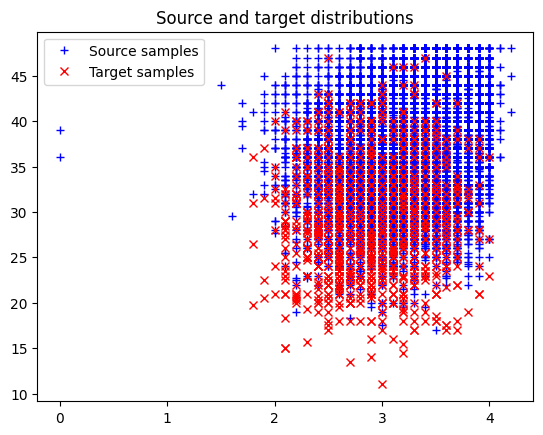

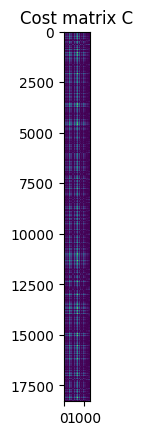

In [171]:
pl.figure(1)
pl.plot(x_white[:, 0], x_white[:, 1], '+b', label='Source samples')
pl.plot(x_black[:, 0], x_black[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('Source and target distributions')

pl.figure(2)
pl.imshow(C, interpolation='nearest')
pl.title('Cost matrix C')

In [172]:
# Transport plan white --> black
pi_white_black = ot.emd(w_white, w_black, C, numItermax=1e8)
pi_black_white = pi_white_black.T

In [173]:
pi_white_black.shape

(18285, 1282)

In [174]:
sum_of_rows = np.sum(pi_white_black, axis=1)
sum_of_rows*n_white

array([1., 1., 1., ..., 1., 1., 1.])

In [175]:
pi_black_white.shape

(1282, 18285)

In [176]:
sum_of_rows = np.sum(pi_black_white, axis=1)
sum_of_rows*n_black

array([1., 1., 1., ..., 1., 1., 1.])

Text(0.5, 1.0, 'OT matrix with samples')

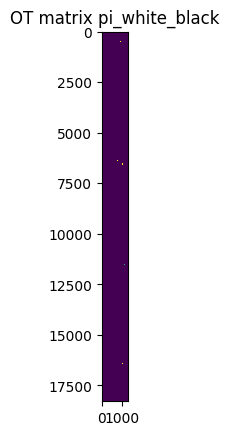

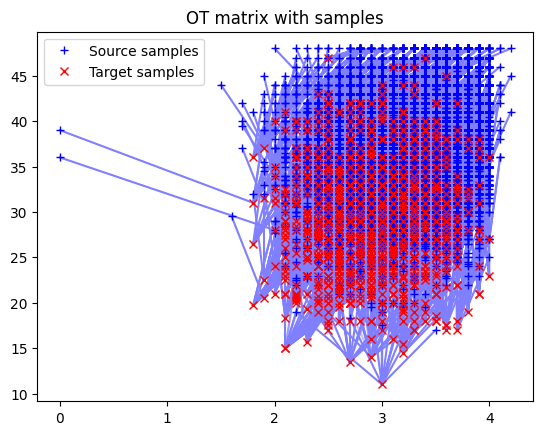

In [177]:
pl.figure(3)
pl.imshow(pi_white_black, interpolation='nearest')
pl.title('OT matrix pi_white_black')

pl.figure(4)
ot.plot.plot2D_samples_mat(x_white, x_black, pi_white_black, c=[.5, .5, 1])
pl.plot(x_white[:, 0], x_white[:, 1], '+b', label='Source samples')
pl.plot(x_black[:, 0], x_black[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('OT matrix with samples')

In [105]:
#I,J = np.where(pi_white_black > 0) # indexes of the non-zero coefficient of the transport matrix
#pi = pi_white_black.flatten()
#pi = pi_white_black[pi_white_black > 0] # flattened array of the non-zero coefficients of the transport matrix
#ot_plans_white_black = [pi,I,J] # sparse representation of the the transport plan

In [44]:
# Transport Black to White
#I,J = np.where(pi_black_white > 0) 
#pi = pi[pi > 0]
#ot_plans_black_white = [pi,I,J]

In [178]:
transformed_x_white = n_white*pi_white_black@x_black

In [179]:
transformed_x_white.shape

(18285, 2)

In [180]:
transformed_x_white

array([[ 2.7, 31. ],
       [ 2.7, 28. ],
       [ 2.6, 21. ],
       ...,
       [ 3.9, 28. ],
       [ 2.5, 22. ],
       [ 3. , 19. ]])

In [181]:
transformed_x_black = n_black*pi_black_white@x_white

In [182]:
transformed_x_black.shape

(1282, 2)

In [183]:
transformed_x_black

array([[ 3.2       , 37.58851518],
       [ 3.28565491, 28.02103363],
       [ 2.95793273, 32.14022423],
       ...,
       [ 3.28597758, 33.        ],
       [ 2.65092152, 41.43910309],
       [ 2.75152858, 36.        ]])

In [184]:
counterfactual_x = x_S.drop(columns=['S'])
counterfactual_x[x_S['S'] == 'White'] = transformed_x_white
counterfactual_x[x_S['S'] == 'Black'] = transformed_x_black

In [185]:
counterfactual_x.head()

,X1,X2
0,2.7,31.0
1,2.7,28.0
2,2.6,21.0
3,3.1,28.0
4,3.2,21.0


In [186]:
counterfactual_x.shape

(19567, 2)

In [187]:
# Define the path to the CSV file
csv_file_path = 'counterfactuals_ot.csv'
counterfactual_x.to_csv(csv_file_path, index=False)